## Определение успешности компьютерных игр

### Задача проекта

Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры 

### Общая информация

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('') # удалил
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Найдем явные дубликаты, если они есть.**

In [5]:
data.duplicated().sum()

0

Явных дубликатов нет.

### Подготовка данных

 **Приводим к нижнему регистру названия столбцов**

In [6]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Работаем с пропусками**

In [7]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Этими играми можно пренебречь. Слишком много пропусков и продажи невелики.

In [8]:
data = data.drop([659,14244])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Видно, что бывают пропуски в столбце **"year_of_release"**. Их немного, можем удалить эти данные.

In [9]:
indexes_to_delete = data[data['year_of_release'].isna()].index
data = data.drop(indexes_to_delete)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Обработаем последние три столбца**

Удалять не можем, так как слишком большой объем данных. Какими значениями заменять пропуски тоже непонятно. Тогда оставим значения пропущенными.

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце **"user_score"** имеем значение *tbd* . Это значит, что данных нет. Заменим эти значения на *NaN*.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

С пропусками закончили. Они могли возникнутьпри копировании данных, либо из-за других технических проблем. Также, нужно учитывать человеческий фактор. Данные могли быть пропущены при заполнении. 

**Заменим типы данных.**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Преобразуем **"year_of_release"** в *integer*. A **"user_score"** в *float*.

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int') 
data['user_score'] = data['user_score'].astype('float', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
data = data.reset_index(drop=True)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Посчитаем суммарные продажи по всем регионам.**

In [17]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные год.**

In [19]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Для наглядности построим график.

<AxesSubplot:>

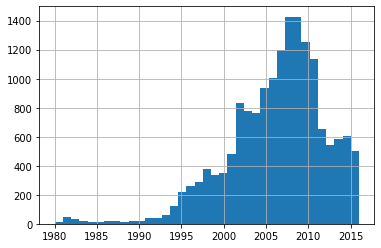

In [20]:
data_year_count = data['year_of_release'].hist(bins=37)
data_year_count

Игры, выпущенные много лет назад, скорее всего потеряли свою актуальность. Поэтому данные по ним нас не слишком интересуют. Возьмём данные, начиная с 2010 года.

Нам будут нужны не все данные, так как большинство игр и платформ, имеющих популярность в 2000-х, сейчас мало кому интересны.

**Посмотрим, как менялись продажи по платформам.**

In [21]:
data_platform_sales = pd.pivot_table(data, index='platform', aggfunc={'sum_sales': 'sum'})
data_platform_sales = data_platform_sales.sort_values('sum_sales',ascending=False).rename(columns={'sum_sales': 'total_sales'})
data_platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Это платформы и количество проданных видеоигр на них.

Оставим топ 10 платформ по продажам.

In [22]:
data_platform_sales = data_platform_sales[:10]
data_platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


По этим платформам построим подробное распределение по годам.

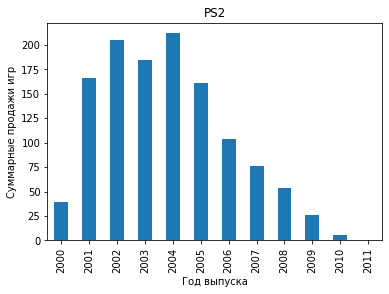

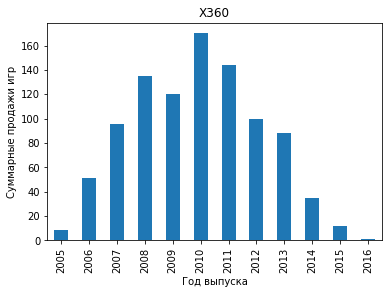

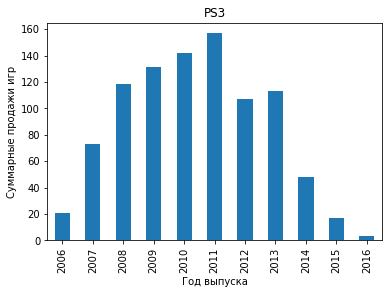

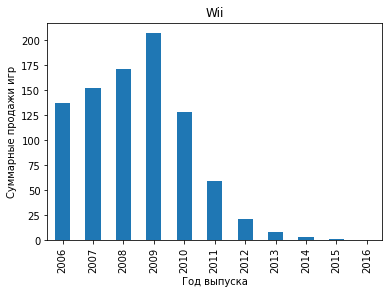

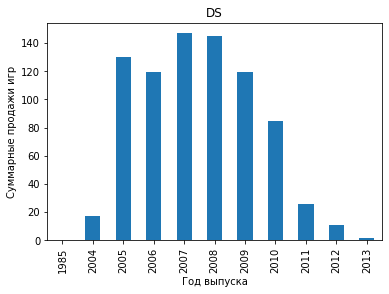

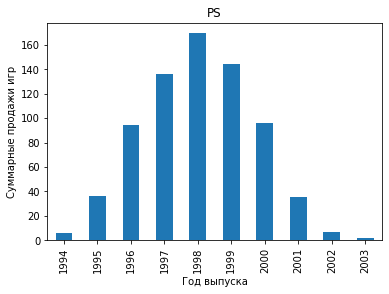

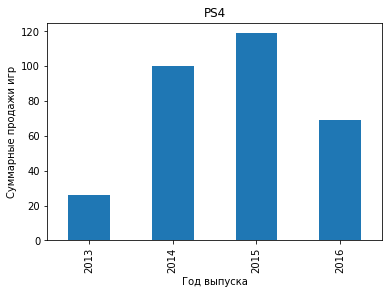

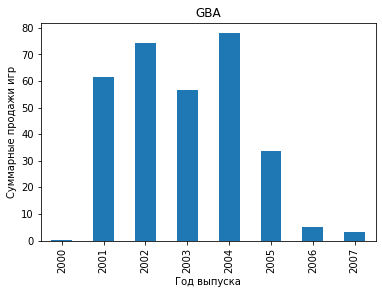

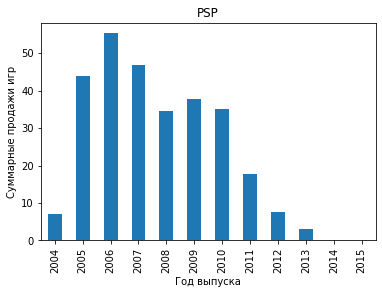

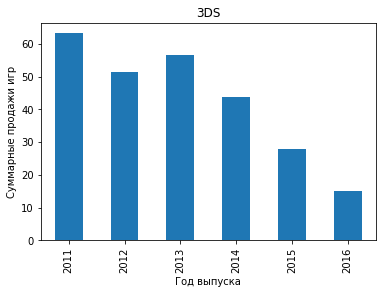

In [23]:
platforms = data_platform_sales.index
data_best_platforms = data.loc[data['platform'].isin(platforms)]
for platform in platforms:
    data_best_platforms[data_best_platforms['platform'] == platform].pivot_table(index=\
                            'year_of_release', values='sum_sales',\
                            aggfunc='sum').plot(kind='bar', title=platform, xlabel='Год выпуска',\
                            ylabel='Суммарные продажи игр',legend=0)
#data_best_platforms.head(15)

Видно, что есть платформы, которые на 2015-2016 год уже практически не имеют продаж. Они нам неинтересны. Замечается тенденция, что через 6-7 лет после того, как на платформе происходит пик продаж, она заметно сокращает объемы продаж и проигрывает конкуренцию другим, более современным платформам. Посмотрим на примере **PS2** и **PS3**.

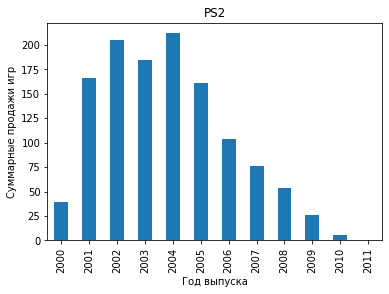

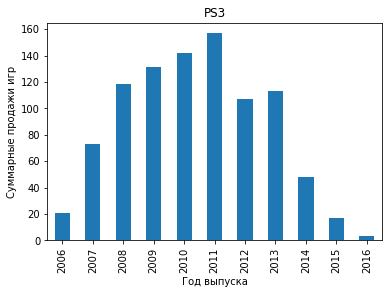

In [24]:
PS_2_3 = ['PS2', 'PS3']
for platform in PS_2_3:
    data_best_platforms[data_best_platforms['platform'] == platform].pivot_table(index=\
                            'year_of_release', values='sum_sales',\
                            aggfunc='sum').plot(kind='bar', title=platform, xlabel='Год выпуска',\
                            ylabel='Суммарные продажи игр',legend=0)


Пик продаж по **PS2** пришелся на 2004 год. В 2006 появляется **PS3**. Она стремительно набирает обороты, уже в 2009 в несколько раз обгоняет **PS2** по продажам. А к 2011 **PS3** доходит до своего пика и полностью вытесняет **PS2** с рынка.

Чтобы построить прогноз на 2017, нужно взять данные за последние 6 лет. Они будут содражать актуальную для нас информацию. Найдем топ 10 платформ по количеству продаж за период с 2014 по 2016.

In [25]:
data = data.query('year_of_release >= 2014')
data_best_platforms_after_2014 = pd.pivot_table(data, index='platform', aggfunc={'sum_sales': 'sum'})
data_best_platforms_after_2014 = data_best_platforms_after_2014.sort_values('sum_sales',ascending=False).rename(columns={'sum_sales': 'total_sales'})
data_best_platforms_after_2014 = data_best_platforms_after_2014[:10] 
data_best_platforms_after_2014

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


По ним построим распределение по годам.

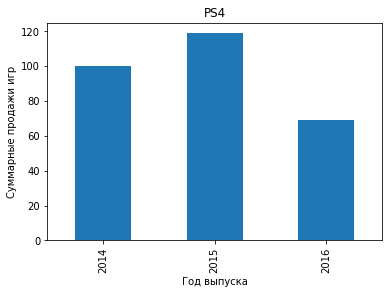

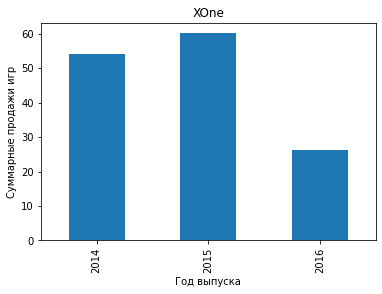

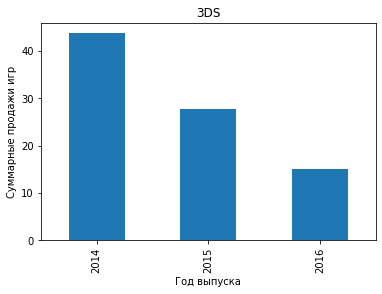

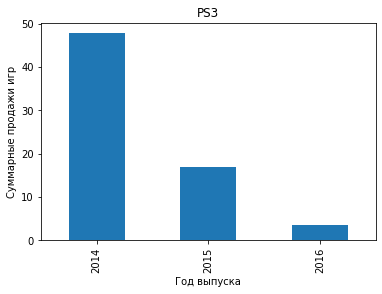

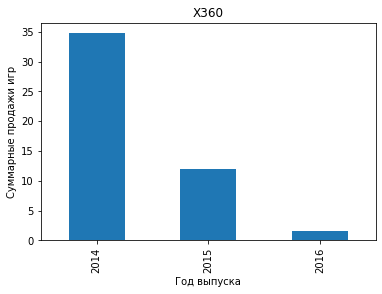

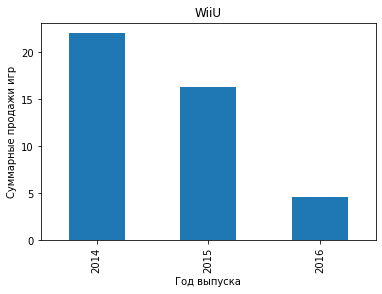

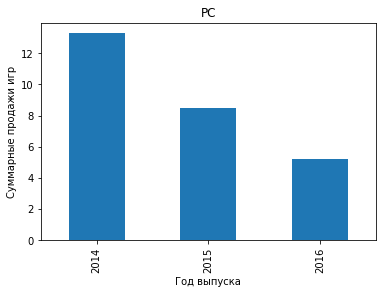

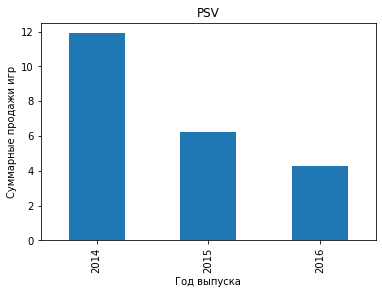

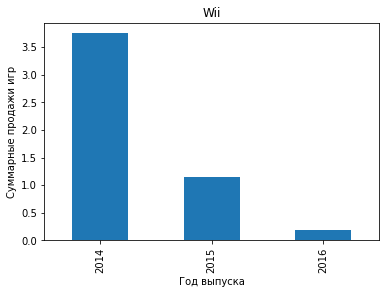

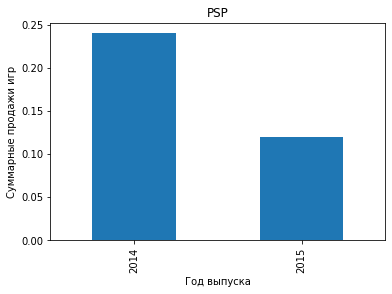

In [26]:
platforms_top_after_2014 = data_best_platforms_after_2014.index
for platform in platforms_top_after_2014:
    data[data['platform'] == platform].pivot_table(index=\
                            'year_of_release', values='sum_sales',\
                            aggfunc='sum').plot(kind='bar', title=platform, xlabel='Год выпуска',\
                            ylabel='Суммарные продажи игр',legend=0)

Глядя на графики, можем выделить платформы **PC**,**XOne**, **3DS**, **PS4**. Они лидируют по продажам за последний год. Однако, даже у них тенденция на снижение продаж. Самыми надежными платформами на 2017 выглядят **XOne** и **PS4**, так как у них пик продаж пришелся на 2015. Тогда весьма многоверотно, что эти платформы будут актуальны и на 2017, и на ближайшие несколько лет.  <br>
Остальные платформы уже потеряли свою популярность. 

<AxesSubplot:title={'center':'sum_sales'}, xlabel='platform'>

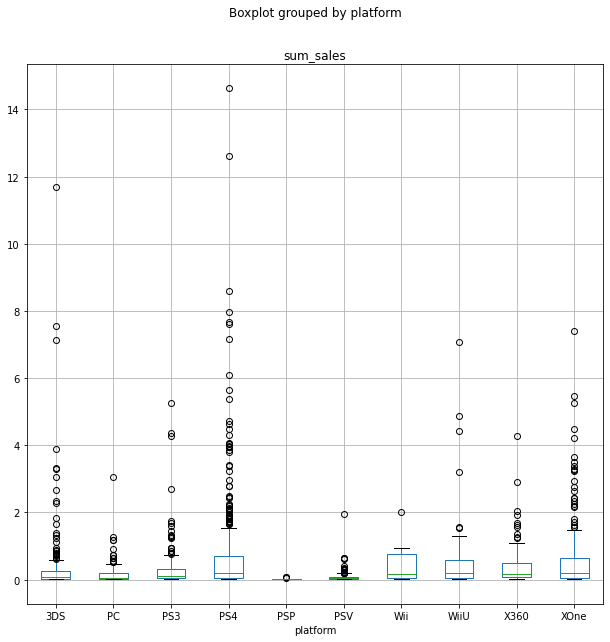

In [27]:
data.boxplot(column='sum_sales',by='platform', figsize=(10,10))

Увеличим масштаб нижней части графика.

(0.0, 2.0)

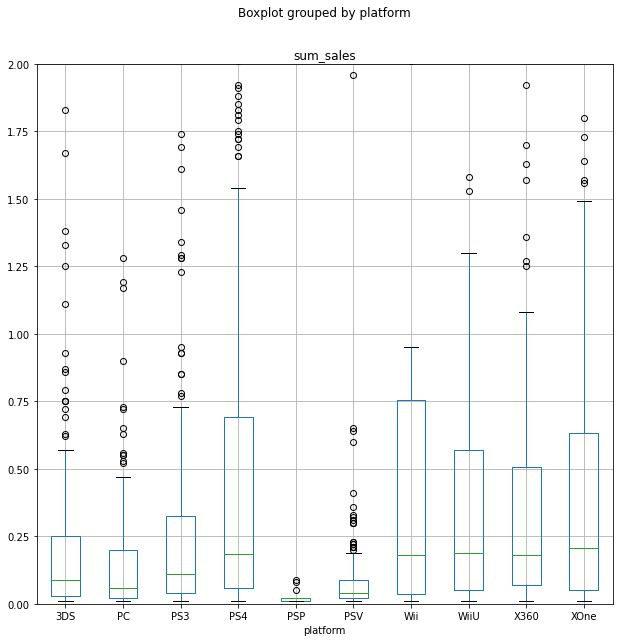

In [28]:
data.boxplot(column='sum_sales',by='platform', figsize=(10,10))
plt.ylim(0,2)

Наглядно видна разница между всеми платформами. На PS4, XOne и 3DS чаще выходят игры, с продажами больше 6 миллионов, чем на других платформах. Анализируя медианы и квартили, можно сказать, что самой привлекательной платформой являются **PS4**.

**Посмотрим, как влияют отзывы на продажи**.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  sum_sales        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


Построим диаграмму рассеяния по платформе **PS4**.

Сначала посмотрим на зависимость оценки пользователей и суммы продаж.

<AxesSubplot:title={'center':'Зависимость оценки польз-й и продаж'}, xlabel='user_score', ylabel='sum_sales'>

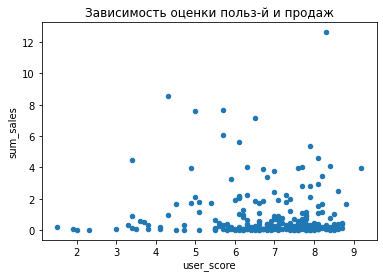

In [30]:
PS4_data = data.query('platform == "PS4"')
PS4_data.plot(kind='scatter', x='user_score', y='sum_sales', title='Зависимость оценки польз-й и продаж')

Посмотрим подробнее значения между оценками 6 и 8.

<AxesSubplot:title={'center':'Зависимость оценки польз-й и продаж'}, xlabel='user_score', ylabel='sum_sales'>

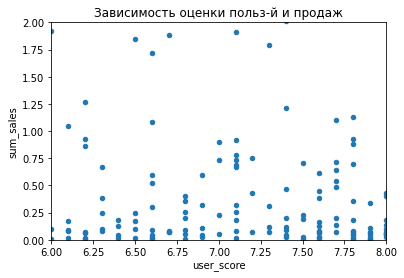

In [31]:
PS4_data.plot(kind='scatter', x='user_score', y='sum_sales', title='Зависимость оценки польз-й и продаж',\
             ylim=(0,2), xlim=(6,8))

Глядя на график, можно сказать, что корреляции нет, либо она очень незначительная. Рассчитаем коэффициент корреляции.

In [32]:
PS4_data['user_score'].corr(PS4_data['sum_sales'])

-0.040131589472697356

Значение очень маленькое, делаем вывод, что зависмости нет.

Проделаем то же самое с оценками критиков.

<AxesSubplot:title={'center':'Зависимость оценки критиков и продаж'}, xlabel='critic_score', ylabel='sum_sales'>

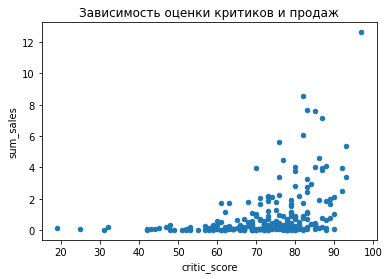

In [33]:
PS4_data.plot(kind='scatter', x='critic_score', y='sum_sales', title='Зависимость оценки критиков и продаж')

Подробнее рассмотрим значения между 40 и 90.

<AxesSubplot:title={'center':'Зависимость оценки критиков и продаж'}, xlabel='critic_score', ylabel='sum_sales'>

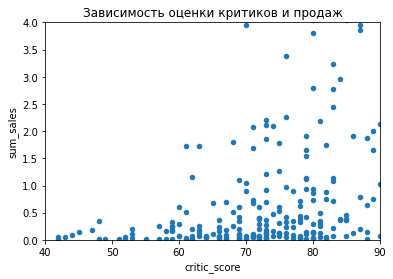

In [34]:
PS4_data.plot(kind='scatter', x='critic_score', y='sum_sales', xlim=(40, 90), ylim=(0,4),
              title='Зависимость оценки критиков и продаж')

Видим, что есть прямая корреляция, причем заметная. Рассчитаем коэффициент корреляции.

In [35]:
PS4_data['critic_score'].corr(PS4_data['sum_sales'])

0.40266141068104083

Значение показывает, что величины коррелируют.

**Тогда делаем вывод**. <br> Отзывы клиентов практически не влияют на продажу, в то время, как отзывы критиков оказывают значительное влияние.

Проверим наши выводы по другим платформам.

In [36]:
data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

PC
Коэффициент зависимости продаж и отзывов пользователей -0.07159665703472451
AxesSubplot(0.125,0.125;0.775x0.755)


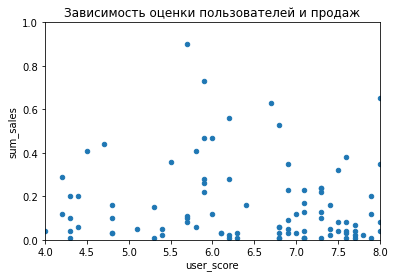

Коэффициент зависимости продаж и отзывов критиков 0.17463413769350036
AxesSubplot(0.125,0.125;0.775x0.755)
XOne
Коэффициент зависимости продаж и отзывов пользователей -0.0703839280647581
AxesSubplot(0.125,0.125;0.775x0.755)


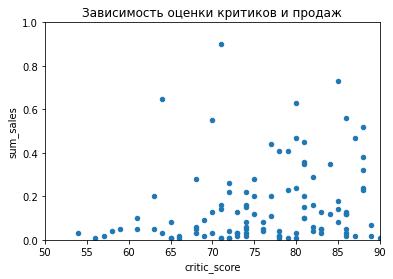

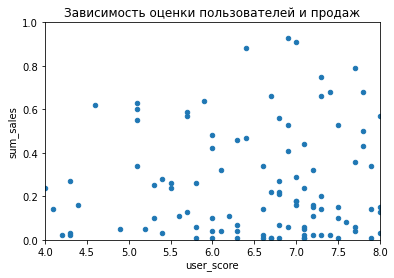

Коэффициент зависимости продаж и отзывов критиков 0.42867694370333226
AxesSubplot(0.125,0.125;0.775x0.755)
3DS
Коэффициент зависимости продаж и отзывов пользователей 0.2151932718527028
AxesSubplot(0.125,0.125;0.775x0.755)


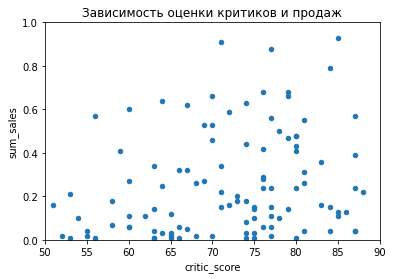

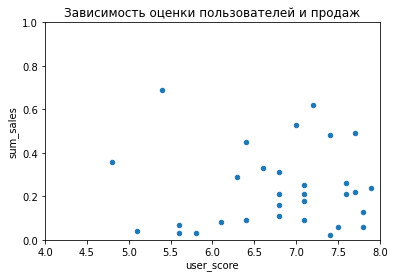

Коэффициент зависимости продаж и отзывов критиков 0.314117492869051
AxesSubplot(0.125,0.125;0.775x0.755)
WiiU
Коэффициент зависимости продаж и отзывов пользователей 0.40792645792170773
AxesSubplot(0.125,0.125;0.775x0.755)


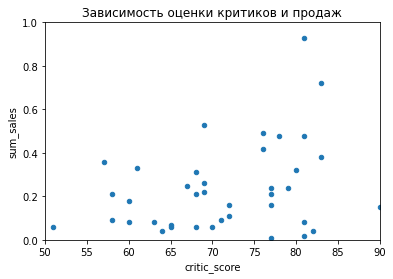

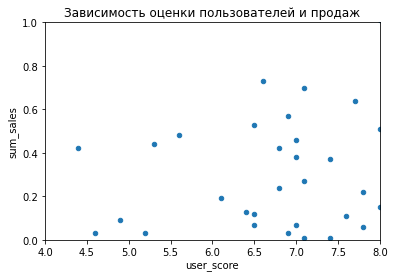

Коэффициент зависимости продаж и отзывов критиков 0.370201412480884
AxesSubplot(0.125,0.125;0.775x0.755)
PS3
Коэффициент зависимости продаж и отзывов пользователей -0.16676141347662118
AxesSubplot(0.125,0.125;0.775x0.755)


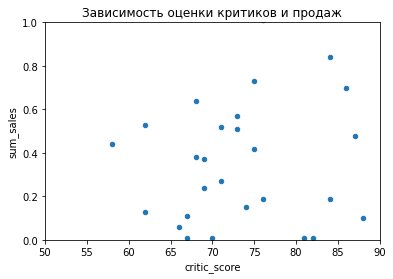

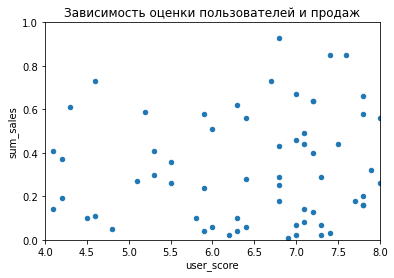

Коэффициент зависимости продаж и отзывов критиков 0.44657460493190704
AxesSubplot(0.125,0.125;0.775x0.755)


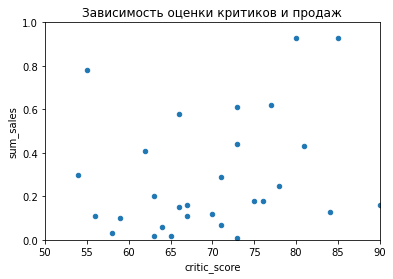

In [37]:
platforms = ['PC', 'XOne', '3DS', 'WiiU', 'PS3']
for value in platforms:
    data_for_value = data[data['platform'] == value]
    print(value)
    print('Коэффициент зависимости продаж и отзывов пользователей', data_for_value['user_score'].corr(data_for_value['sum_sales']))
    print(data_for_value.plot(kind='scatter', x='user_score', y='sum_sales', xlim=(4,8), ylim=(0,1), \
              title='Зависимость оценки пользователей и продаж'))
    plt.show()
    print('Коэффициент зависимости продаж и отзывов критиков', data_for_value['critic_score'].corr(data_for_value['sum_sales']))
    print(data_for_value.plot(kind='scatter', x='critic_score', y='sum_sales', xlim=(50,90), ylim=(0,1), \
              title='Зависимость оценки критиков и продаж'))
    data_for_value = data

В большинстве случаев, отзывы пользователей действительно не оказывают большого влияния на продажи, и абсолютно везде отзывы критиков имеют значительное влияние на продажи.

**Посмотрим на распределение игр по жанрам.**

Рассчитаем суммарные продажи по каждому жанру.

In [38]:
data_genres = pd.pivot_table(data, index='genre', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending=False).\
                             rename(columns={'sum_sales':'total_sales'})
data_genres

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Выделяются жанры **Action** и **Shooter** с самыми высокими продажами. С другой стороны, **Strategy** и **Puzzle** имеют самые низкие продажи.

<AxesSubplot:title={'center':'sum_sales'}, xlabel='genre'>

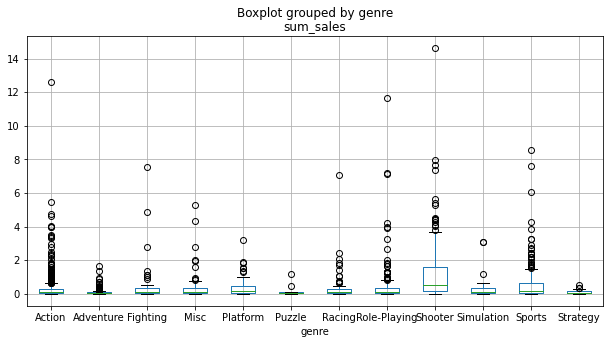

In [39]:
data.boxplot(column='sum_sales', by='genre', figsize=(10,5))

Увеличим масштаб.

(0.0, 4.0)

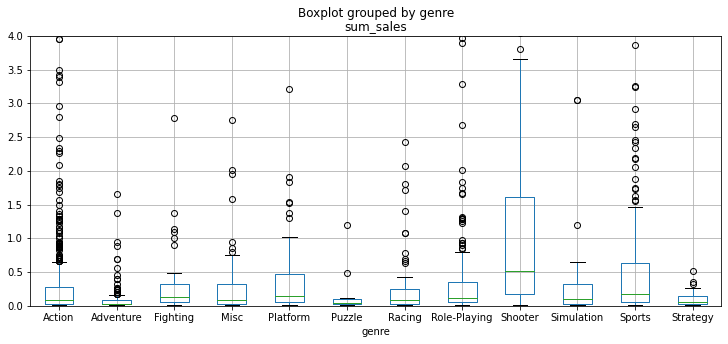

In [40]:
data.boxplot(column='sum_sales', by='genre', figsize=(12,5))
plt.ylim(0,4)

Видим, что самыми надежными явлются жанры Shooter, Sports и Platform.

### Портрет пользователя каждого региона

#### Самые популярные платформы для каждого региона

In [41]:
data = data.reset_index(drop=True)
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


**Северная Америка**

In [42]:
na_total = data['na_sales'].sum()
na_top_platform = pd.pivot_table(data, index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
na_top_platform = na_top_platform[:5] 
na_top_platform['share'] = round(na_top_platform['na_sales']/ na_total, 3)
na_top_platform

,na_sales,share
platform,,
PS4,98.61,0.347
XOne,81.27,0.286
X360,28.30,0.100
3DS,22.64,0.080
PS3,22.05,0.078


В Северной Америке платформы **X360** и **PS3** занимают 50% рынка по продажам игр.

**Европа**

In [43]:
eu_total = data['eu_sales'].sum()
eu_top_platform = pd.pivot_table(data, index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_top_platform = eu_top_platform[:5] 
eu_top_platform['share'] = round(eu_top_platform['eu_sales']/ eu_total, 3)
eu_top_platform

,eu_sales,share
platform,,
PS4,130.04,0.480
XOne,46.25,0.171
PS3,25.54,0.094
PC,17.97,0.066
3DS,16.12,0.060


В Европе на рынке господствуют платформы **PS3**, **X360** и **PS4**. Они составляют 61% рынка.

**Япония**

In [44]:
jp_total = data['jp_sales'].sum()
jp_top_platform = pd.pivot_table(data, index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_top_platform = jp_top_platform[:5] 
jp_top_platform['share'] = round(jp_top_platform['jp_sales']/ jp_total, 3)
jp_top_platform

,jp_sales,share
platform,,
3DS,44.24,0.475
PS4,15.02,0.161
PSV,14.54,0.156
PS3,11.22,0.121
WiiU,7.31,0.079


В Японии лидируют **3DS**, **PS3** и **PSP**. Их доля равна 66%

#### Самые популярные жанры

**Северная Америка**

In [45]:
values = ['na_sales', 'eu_sales', 'jp_sales']
for value in values:
    pivot_table = pd.pivot_table(data, index='genre', values=value , aggfunc='sum').sort_values(value, ascending=False)
    pivot_table = pivot_table[:5]
    print(pivot_table)
    print()

              na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05

              eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13

              jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87



В Японии очень популярны компьютерные ролевые игры, поэтому они занимают большую часть рынка. А вот игры, связанные со спортом им не сильно интересны.<br>В Северной Америке и Европе набор популярных игр примерно одинаковый.

### Влияет ли рейтинг ESRB на продажи

In [46]:
data['rating'] = data['rating'].fillna('no info')

In [47]:
values = ['na_sales', 'eu_sales', 'jp_sales']
for value in values:
    data_grouped_ESRB = pd.pivot_table(data, index='rating', values=value, aggfunc='sum').sort_values(value, ascending=False)
    print(data_grouped_ESRB)
    print()

         na_sales
rating           
M           96.42
no info     64.72
E           50.74
T           38.95
E10+        33.23

         eu_sales
rating           
M           93.44
no info     58.95
E           58.06
T           34.07
E10+        26.16

         jp_sales
rating           
no info     56.90
T           14.78
E            8.94
M            8.01
E10+         4.46



Глядя на таблицы, очевидно, что рейтинг **ESRB** влияет на продажи в Америке и Европе, но не влияет на продажи в Японии.

### Проверка гипотез

In [49]:
from scipy import stats as st

**Гипотеза 1.**<br>
**H0**: Средние пользовательские рейтинги платформ XOne и PC одинаковые.<br>
**H1**: Средние пользовательские рейтинги платформ XOne и PC разные.

Нам нужно сравнить среднее двух генеральных совокупностей. Для этого подойдет метод **st.ttest_ind().**

Критический уровень статистической значимости возьмем равным **0.05.**<br>
Если наше значение окажется меньше, то отвергнем нулевую гипотезу.

In [50]:
XOne_user_score = data[data['platform'] == "XOne"]['user_score'].dropna()
PC_user_score = data[data['platform'] == "PC"]['user_score'].dropna()

results = st.ttest_ind(XOne_user_score, PC_user_score)
print('p-значение:', results.pvalue)

p-значение: 0.10450507919348415


Тогда делаем вывод, что нулевая гипотеза верна, и не будем ее отвергать. 

**Гипотеза 2.**<br>
**H0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br>
**H1**: Средние пользовательские рейтинги жанров Action и Sports разные.

Нам так же нужно сравнить среднее двух генеральных совокупностей. Для этого подойдет метод **st.ttest_ind().**

Критический уровень статистической значимости возьмем равным **0.05.**<br>
Если наше значение окажется меньше, то отвергаем нулевую гипотезу.

In [51]:
Action_user_score = data[data['genre'] == "Action"]['user_score'].dropna()
Sports_user_score = data[data['genre'] == "Sports"]['user_score'].dropna()

results = st.ttest_ind(Action_user_score, Sports_user_score)
print('p-значение:', results.pvalue)

p-значение: 2.8711147985105864e-19


Тогда делаем вывод, что нулевая гипотеза ложна. Значит отвергаем ее и принимаем альтернативную гипотезу.

### Общий вывод

Работа была очень объемной и интересной. Было проведено много исследований, выявлено закономерностей и рассмотрено гипотез. Перед этим мы ознакомились с данными, подготовили их, избавились от пропусков и заменили типы данных там, где необходимо. Не упустили и исследовательский анализ данных. Здесь мы группировали данные по разным признакам. Также, сравнивали одни платформы с другими, узнали, какие жанры популярны в том или ином регионе. Проверили, как коррелируют одни значения с другими. Цель исследования достигнута. После просмотра моего проекта можно с уверенностью сказать, на каких платформах какие жанры игр будут популярны, в разных регионах нашей планеты!

Я рекомендую выходить на рынок компьютерных игр на платофрме PS4 с игрой в жанре **Shooter**. Продвигать игру стоит в Северной Америке. Важно учитывать, что нашей игре нужен хороший рейтинг **ESRB** и хорошие отзывы критиков, ведьэти показатели значительно влияют на продажи.